<a href="https://colab.research.google.com/github/Eswa2020/moringa_school_projects/blob/master/Esther_Wairimu_Kamau_Independent_project_week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Specifying the problem statement


 The goal of this project is to demonstrate the concept of hypothesis testing by investigating a claim about blue cars using a dataset from an electric car sharing service company called Autolib. More specifically, we will be comparing the blue car usage rates in  France since Autolib was an electric car sharing service inaugurated in Paris.
We will be using the Autolib dataset to perform Univariate and Bivariate Analysis for Paris and Hauts-de-Seine, which are two main French cities. Below are the specific hypotheses of interest for this analysis:

>Null Hypothesis: Motorists who use Autolibs'Blue Car during the weekend are from Hauts-de-Seine

>> Ho : μ1 = μ2

>Alternative Hypothesis: Motorists who use Autolibs'Blue Car during the weekend not from Hauts-de-Seine.

>> Ha : μ1 ≠ μ2

# Metrics for Success

our project will be a success when we are able to achieve the following:

>*   Specify the null and alternative hypothesis.
>*   Perform EDA(Exploratory Data Analysis) to uncover trends within the dataset.
>*   Perform hypothesis testing and interpret the results.
>*   Give summaries and conclusions.

# Data Understanding

>Autolib' was an electric car sharing service which was inaugurated in Paris, France, in December 2011. It closed on July 31st 2018.It was operated by the Bolloré industrial group. The Autolib' scheme maintained a fleet of all-electric Bolloré Bluecars for public use on a paid subscription basis, employing a citywide network of parking and charging stations.As of 3 July 2016, 3,980 Bluecars had been registered for the service, and the scheme had more than 126,900 registered subscribers.Autolib' furthermore offered 1,084 electric car stations in Paris agglomeration with 5,935 charging points.

>Since beginning operations in Paris, Autolib' expanded its business to the cities of Lyon and Bordeaux.Bolloré also signed deals to begin operating offshoots of Autolib' in London and Indianapolis in 2015,Turin in 2016 and Singapore in 2017.

> Autolib was in France that was operational between 2011 and 2018. The company had three types of electric cars i.e blue cars, Utilib cars and Utilib 1.4 cars. Blue cars were most popularly used. 

>Bluecars were available in different postal codes in France and renters could pick up cars in one station then drop them off at a different station that was closer to their destination.

> The dataset contains information for different postal codes for 6 months i.e.between January 2018 and June 2018.
>France is divided into 101 departments :
* 96 departments in mainland France, numbered 1 through 95 and 5 overseas departments (which are also regions) They are divided into 343 districts ("arrondissements"), 4 058 townships("cantons") and 36 699 towns ("communes").
Each department has a capital city or prefecture department which includes its institutions. This capital is often the largest city of the department.
* Region : Ile-de-France
(75) Department Paris
(77) Department Seine-et-Marne
(78) Department Yvelines
(91) Department Essonne
(92) Department Hauts-de-Seine
(93) Department Seine-St-Denis
(94) Department Val-de-Marne
(95) Department Val-D'Oise
* our dataset has all these departments from 75-95..so our autolib dataset is  from The region Ile-de-France ,which contains The capital city Paris.

# Steps for undertaking Experimental Design

> Below are the steps that will be conducted in this analysis in order to meet our projects expectations :


>*   Load data and check on the characteristics of the dataset
>*   Perform Data cleaning (check for and deal with outliers, anomalies,duplicates,null and missing data)
>*   Perform univariate and bivariate analysis
>*   Specify the null and alternative hypotheses
>*   Explain the sampling method 
>*   Perform hypothesis testing
>*   Discuss the hypothesis test results
>*   Provide project summary and conclusion
>*   Challenge our solution by providing insights on how we can make improvements.

# Appropriateness of Dataset

>The dataset to use for this project can be found here [http://bit.ly/DSCoreAutolibDataset]

>The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network for Bluecar,utilib and utilib 14 cars

# Importing Libraries

In [50]:
# Importing Pandas
# 
import pandas as pd
import pandas_profiling as pp


In [51]:
#Importing Numpy
import numpy as np

In [53]:
#Importing Seaborn
import seaborn as sns

In [54]:
#Importing Matplotlib
import matplotlib.pyplot as plt

In [55]:
#importing scipy
from scipy import stats

from scipy.stats import norm

from scipy.stats import t

import math

from scipy.stats import ttest_ind

from statsmodels.stats import weightstats as stests


In [7]:
import warnings
warnings.filterwarnings('ignore')

#Loading the Dataset

In [49]:
#loading our datasets
#variable_definitions
autolib_def=pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib_def.head(5)


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# previewing the dataset

In [ ]:
# Checking the bottom 5 records of the dataset

autolib_def.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
#getting to know the number of columns and rows in the data set
autolib_def.shape

(16085, 13)

In [ ]:
# Checking datatypes for each attribute and previewing the existence of null values
#there are no null values in this dataset
autolib_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# Data Cleaning

In [56]:
# Since we only  interested in learning more about blue cars only
# we can drop all other unnecessary columns

autolib_def=autolib_def.drop(autolib_def.columns[7:], axis=1)
autolib_def.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


In [57]:
# then we we rename the columns for uniformity among the column names

autolib_def.columns = ['postal_code', 'date', 'daily_data_points', 'day_of_week', 'day_type', 'total_bluecars_taken', 
                'total_bluecars_returned']
autolib_def.head(1)

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103


In [58]:
# Removing spaces and uppercases in the columns names
autolib_def.columns = autolib_def.columns.str.lower().str.replace(" ", "")
autolib_def.head()

,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,75001,1/1/2018,1440,0,weekday,110,103
1,75001,1/2/2018,1438,1,weekday,98,94
2,75001,1/3/2018,1439,2,weekday,138,139
3,75001,1/4/2018,1320,3,weekday,104,104
4,75001,1/5/2018,1440,4,weekday,114,117


## checking for Outliers

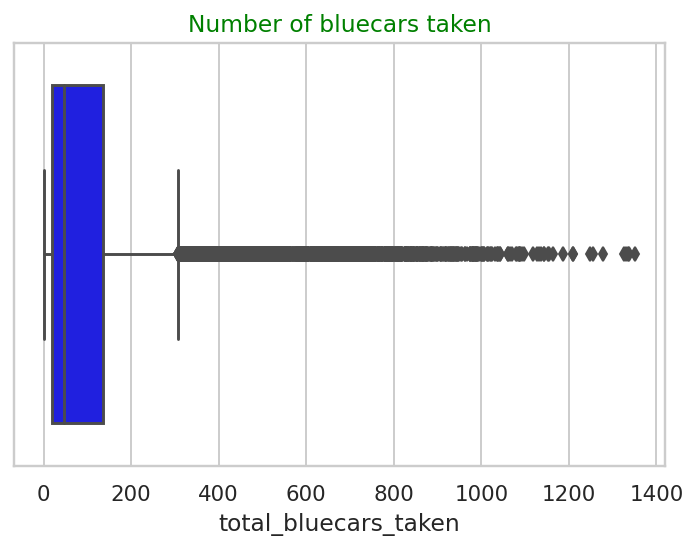

In [ ]:
# Checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 140)
sns.boxplot(autolib_def['total_bluecars_taken'] , color = 'blue')
plt.title("Number of bluecars taken", color = 'Green')
plt.show()

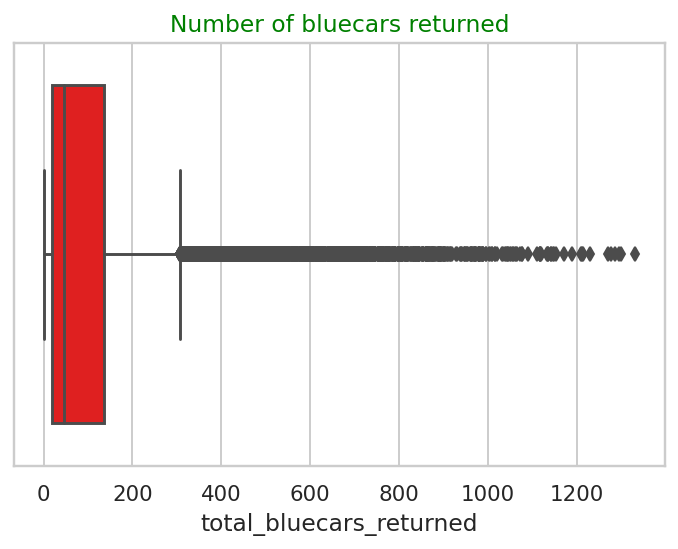

In [ ]:
# Checking for outliers on the bluecars_returned_sum using boxplot

plt.figure(dpi = 140)
sns.boxplot(autolib_def['total_bluecars_returned'] , color = 'red')
plt.title("Number of bluecars returned", color = 'Green')
plt.show()

>* There are very many 'outliers' in the dataset for the number of blue cars taken and returned. However, there is no sufficient evidence that point to the likelihhod of these outliers being erroneous records. Since the outliers will definitely affect our observations, we will delete them.
>*we will investigate them further before dropping them

## checking for  Anomalies

Interquartile Range (IQR) is important because it is used to define the outliers. It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker.

In [ ]:
# Checking for Anomalies
# 'blue cars taken' variable

q1_taken = autolib_def['total_bluecars_taken'].quantile(.25)
q3_taken = autolib_def['total_bluecars_taken'].quantile(.75)

iqr_taken = q3_taken - q1_taken
#checking for anomalies
# 'blue cars returanned' variable
q1_returned = autolib_def['total_bluecars_returned'].quantile(.25)
q3_returned = autolib_def['total_bluecars_returned'].quantile(.75)

iqr_returned = q3_returned - q1_returned

#checking for anomalies
# 'available data points' variable
q1_points = autolib_def['daily_data_points'].quantile(.25)
q3_points = autolib_def['daily_data_points'].quantile(.75)

iqr_points = q3_points - q1_points

print(iqr_taken, iqr_returned, iqr_points) 

115.0 115.0 1.0


> The IQR results show that the blue cars taken and blue cars returned have 115 records that are not within the middle 50%(Q2) of the records in those VARIABLES.

> The daily data points have only 1 record that does not lie within the upper and lower bounds.

## checking for missing Values

In [22]:
#re-checking to confirm there are is zero null columns
autolib_def.isnull().sum()

postal_code                0
date                       0
daily_data_points          0
day_of_week                0
day_type                   0
total_bluecars_taken       0
total_bluecars_returned    0
dtype: int64

In [19]:
#checking for not null columns
autolib_def.notnull().sum()
#shows our  dataset has no null values

postal_code                16085
date                       16085
daily_data_points          16085
day_of_week                16085
day_type                   16085
total_bluecars_taken       16085
total_bluecars_returned    16085
dtype: int64

In [20]:
# re-Checking for the data types of each column specifically
autolib_def.dtypes

postal_code                 int64
date                       object
daily_data_points           int64
day_of_week                 int64
day_type                   object
total_bluecars_taken        int64
total_bluecars_returned     int64
dtype: object

In [21]:
#check if there are duplicates
autolib_def.duplicated().sum()
#there are no duplicates in our dataset

0

In [23]:
#Getting to know more about the dataset by accessing its information

autolib_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   postal_code              16085 non-null  int64 
 1   date                     16085 non-null  object
 2   daily_data_points        16085 non-null  int64 
 3   day_of_week              16085 non-null  int64 
 4   day_type                 16085 non-null  object
 5   total_bluecars_taken     16085 non-null  int64 
 6   total_bluecars_returned  16085 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 879.8+ KB


## Removing Outliers and saving clean dataset

In [59]:
# Removing the Outliers
#we use the IQR to remove outliers like shown below
Q3 = autolib_def.quantile(0.75)
Q1 = autolib_def.quantile(0.25)

IQR = Q3-Q1

clean_data = autolib_def[~((autolib_def< (Q1 - 1.5 * IQR)) |(autolib_def > (Q3 + 1.5 * IQR))).any(axis=1)]
print(clean_data.shape)

(10024, 7)


In [60]:
# Save the cleaned dataset
clean_data.to_csv('./autolib_clean.csv')

#Univariate Analysis

>When performing the univariate analysis we will perform the actions below to try and undestand our dataset:

*   Calculate measures of central tendecy
*   Calculate the value spread in the data

*   Calculate measures of shape
*   Explore measures of concentration





In [61]:
#we will be using the data without outliers
autolib_clean = pd.read_csv("./autolib_clean.csv")

## Measures of central tendecy

In [15]:
# We can check the mean, mode and median of blue cars taken variable in our dataset

mean_taken = autolib_clean['total_bluecars_taken'].mean()
median_taken = autolib_clean['total_bluecars_taken'].median()
mode_taken = autolib_clean['total_bluecars_taken'].mode()

print(mean_taken, median_taken, mode_taken)

51.84357541899441 35.0 0    12
dtype: int64


In [ ]:
# We can check the mean, mode and median of blue cars returned in the dataset

mean_returned = autolib_clean['total_bluecars_returned'].mean()
median_returned = autolib_clean['total_bluecars_returned'].median()
mode_returned = autolib_clean['total_bluecars_returned'].mode()

print(mean_returned, median_returned, mode_returned)

51.816141260973666 35.0 0    13
dtype: int64


## Value spread in the data

In [ ]:
# Checking the various measures of dispersion for the number of blue cars taken variable
# standard deviation, variance, range, skewness and kurtosis

std1= autolib_clean['total_bluecars_taken'].std()
var1= autolib_clean['total_bluecars_taken'].var()

max1 = autolib_clean['total_bluecars_taken'].max()
min1 = autolib_clean['total_bluecars_taken'].min()
range1= max1 - min1

skew1 = autolib_clean['total_bluecars_taken'].skew()
kurt1 = autolib_clean['total_bluecars_taken'].kurt()

print('Standard Deviation is ' + str(std1))
print('Variance is ' + str(var1))
print('Range is ' + str(range1))
print('Skewness is ' + str(skew1))
print('Kurtosis is ' + str(kurt1))

Standard Deviation is 50.22468992265321
Variance is 2522.519477826663
Range is 302
Skewness is 1.875107464585823
Kurtosis is 4.173840111974478


In [ ]:
# Checking the various measures of dispersion for the blue cars returned variable
# standard deviation, variance, range, skewness and kurtosis
std2= autolib_clean['total_bluecars_returned'].std()
var2 = autolib_clean['total_bluecars_returned'].var()

max2 = autolib_clean['total_bluecars_returned'].max()
min2 = autolib_clean['total_bluecars_returned'].min()
range2 = max2 - min2

skew2= autolib_clean['total_bluecars_returned'].skew()
kurt2 = autolib_clean['total_bluecars_returned'].kurt()

print('Standard Deviation of the variable is ' + str(std1))
print('Variance of the variable is ' + str(var2))
print('Range of the variable is' + str(range2))
print('Skewness of the variable is ' + str(skew2))
print('Kurtosis of the variable is ' + str(kurt2))

Standard Deviation of the variable is 50.22468992265321
Variance of the variable is 2513.553841000062
Range of the variable is306
Skewness of the variable is 1.880169014990995
Kurtosis of the variable is 4.184956269278061


In [25]:
# check for the value counts of  the day type i.e weekday or weekends variable
#our weekdays has high value counts this will be essential in coming up with hypotheses
autolib_clean.day_type.value_counts()

weekday    6946
weekend    3078
Name: day_type, dtype: int64

In [26]:
# check for the value counts of  the postal code variable
#with 0=monday and 6=sunday
#when visualising we will change the numericals to strings
autolib_clean.day_of_week.value_counts()

6    1620
0    1549
1    1543
5    1458
2    1386
4    1312
3    1156
Name: day_of_week, dtype: int64

In [66]:
#to be able to visualise the busiest day of the week we will change our variable from numerics
#0-6 and put strings(mon,tue,etc)
# Converting the day of week from from numericals to strings for plotting
# we will be using the map code

# Replacing day_of week code with actual names

encode = {"day_of_week" : {0:"mon", 1:"tue", 2:"wed", 3:"thur",
                           4:"fri", 5:"sat", 6:"sun"}} 
        
#Confirming that our dataset day_type columns was successfully converted
autolib_clean.replace(encode, inplace = True)
autolib_clean.head()

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
0,3899,91330,1/1/2018,1440,mon,weekday,19,9
1,3900,91330,1/2/2018,1438,tue,weekday,10,10
2,3901,91330,1/3/2018,1439,wed,weekday,11,13
3,3903,91330,1/5/2018,1440,fri,weekday,10,6
4,3905,91330,1/7/2018,1440,sun,weekend,28,17


In [67]:
autolib_clean.tail()

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned
10019,16079,95880,6/14/2018,1439,thur,weekday,15,13
10020,16080,95880,6/15/2018,1440,fri,weekday,15,10
10021,16081,95880,6/16/2018,1440,sat,weekend,19,19
10022,16082,95880,6/17/2018,1440,sun,weekend,33,35
10023,16083,95880,6/18/2018,1440,mon,weekday,11,14


* Here we first use of value_counts() we call on the postal code column that returns us the count of occurences of each of the unique values in this column.
* Then we do the same operation, but this time sort our outputted values in the postal code column, so that values that start with the code that appear least times to the highest.This is considered as ascending order.
* We also wanted to know what percentage of the whole is for each value that appears in the column.  So, what percentage of postal code thats the least 92100.The calculation is 0.000998 x 100 =0.0998 %.
for the highest which is postal code /94130/94500/94700
The calculation
 0.012969x100=1.2969 %
* To calculate this in pandas with the value_counts() method, set the argument normalize to True.

In [80]:
autolib_clean['postal_code'].value_counts(ascending=True)

92100     10
93390     72
93200    103
92130    111
92340    122
        ... 
95100    130
94700    130
94500    130
94300    130
94130    130
Name: postal_code, Length: 79, dtype: int64

In [82]:
autolib_clean['postal_code'].value_counts(normalize=True,ascending=True)

92100    0.000998
93390    0.007183
93200    0.010275
92130    0.011073
92340    0.012171
           ...   
95100    0.012969
94700    0.012969
94500    0.012969
94300    0.012969
94130    0.012969
Name: postal_code, Length: 79, dtype: float64

In [83]:
autolib_clean['postal_code'].value_counts(bins=10)

(92240.0, 92695.0]      2461
(94060.0, 94515.0]      1820
(91785.0, 92240.0]      1809
(93150.0, 93605.0]      1727
(92695.0, 93150.0]       777
(93605.0, 94060.0]       390
(91325.449, 91785.0]     390
(95425.0, 95880.0]       260
(94515.0, 94970.0]       260
(94970.0, 95425.0]       130
Name: postal_code, dtype: int64

##  Measures of shape

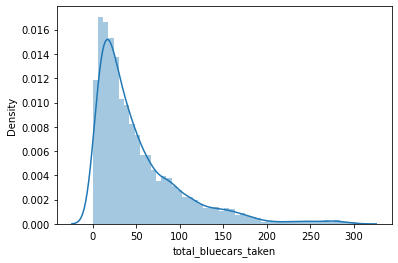

In [17]:
# Histogram of the bluecars_taken sum

sns.distplot(autolib_clean.total_bluecars_taken, kde = True)


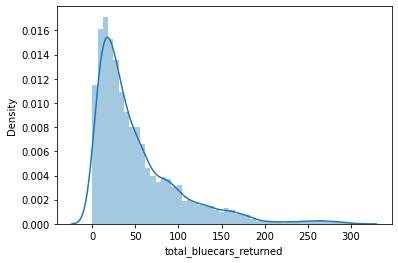

In [18]:
 # plotting a  sns histogram of the bluecars_taken sum

sns.distplot(autolib_clean.total_bluecars_returned, kde = True)


* The normal distribution is a bell-shaped, symmetrical distribution in which the mean, median and mode are all equal. If the mean, median and mode are unequal, the distribution will be either positively or negatively skewed. Consider the CALCULATIONS ABOVE.

* In our case our variables have a right-tailed skewed distribution,because the tail is long to the right side.



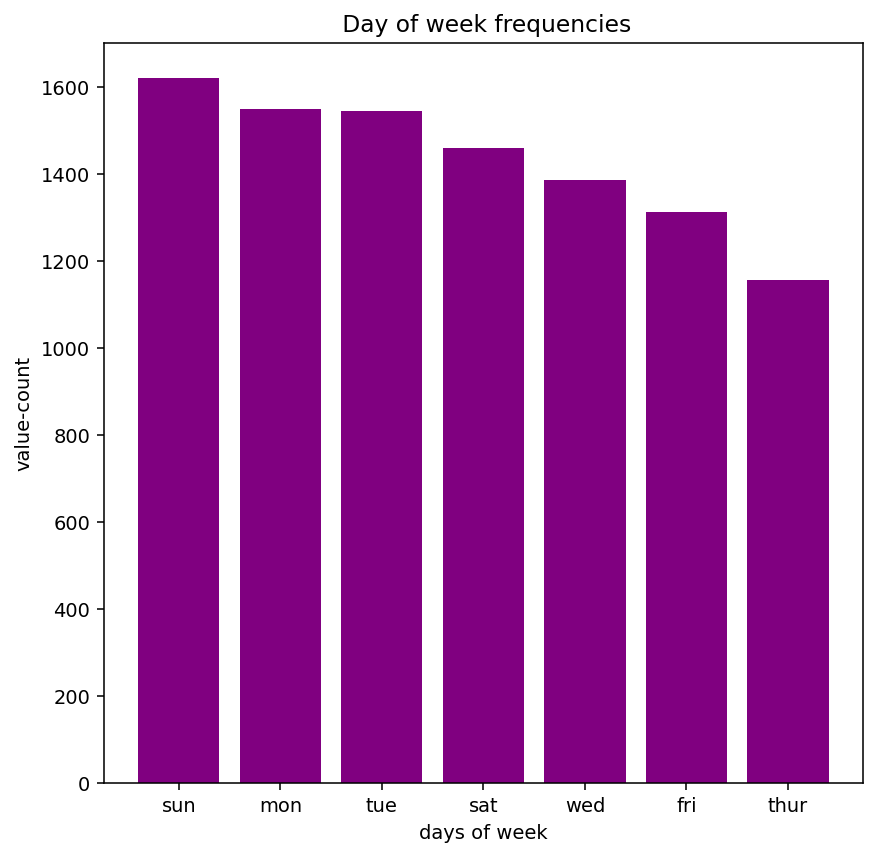

In [74]:
#getting the most frequent day to appear
day = autolib_clean.day_of_week.value_counts()
day
value_count=day.index
plt.figure(figsize = (7,7), dpi = 140)
plt.bar(value_count,day, color = 'purple')
plt.ylabel("value-count")
plt.xlabel('days of week')
plt.title(" Day of week frequencies", color = 'black')
plt.show()

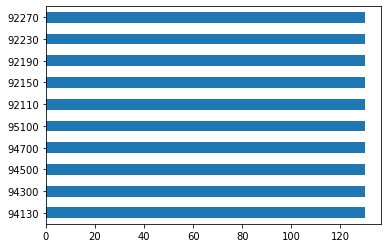

In [87]:
autolib_clean['postal_code'].value_counts()[:10].plot(kind='barh')

As confirmed in the value spread the postal codes from our cleaned data almost have the same value.This will help in coming up with the hypotheses

# Bivariate Analysis

>The most important graphical summary of bivariate data is the
scatterplot. This is simply a plot of the points (Xi
, Yi) in the plane.
>The following figures show scatterplots of blue cars taken 
against blue cars returned

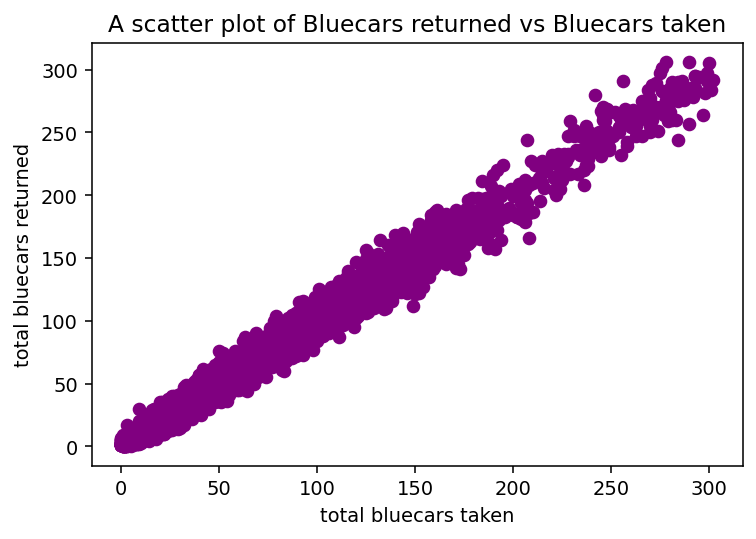

In [48]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables
plt.figure(dpi = 140)
plt.scatter(autolib_clean['total_bluecars_taken'], autolib_clean['total_bluecars_returned'], color = 'purple')
plt.title('A scatter plot of Bluecars returned vs Bluecars taken', color = 'black')
plt.xlabel('total bluecars taken')
plt.ylabel('total bluecars returned')
plt.show()


A key feature in a scatterplot is the association, or correalation between
blue cars returned and blue cars taken.
The total sum of the blue cars taken and blue cars returned have a positive corelation so these two variables have a positive association.
We cannot draw causal implications from  the above statements about associations, unless your we do a randomized experiment
In general, if blue car taken and blue car returned have an association, then
* blue cars returned could cause blue cars taken to change
* blue cars taken could cause blue cars returned to change
* a third unmeasured (perhaps postal codes) variable could cause both blue cars returned and blue cars taken to change.
*  The correlation with the postal code can be ignored here since the postal code has a qualitative characteristic even though it has a numeric data type.
* nb:Unless your data come from a randomized experiment, statistical analysis alone is not capable of answering questions about project.
* we go ahead and see the highest days of the week that blue cars are returned and taken

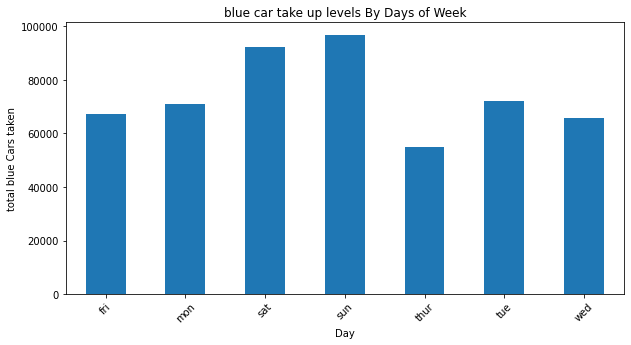

In [64]:
#Bar chart showing total number of blue cars picked up by day of week
#
autolib_clean.groupby('day_of_week')['total_bluecars_taken'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("total blue Cars taken")
plt.title("blue car take up levels By Days of Week")
plt.show()

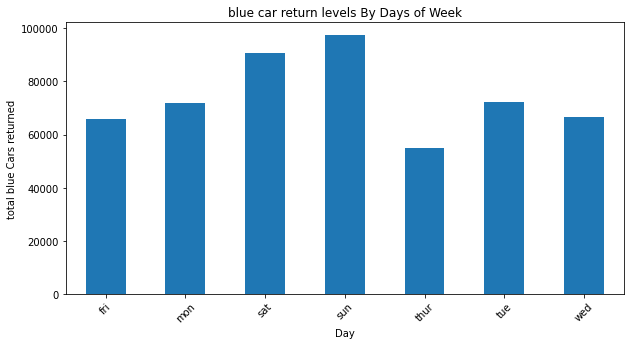

In [65]:
#Bar chart showing total number of blue cars picked up by day of week
#
autolib_clean.groupby('day_of_week')['total_bluecars_returned'].sum().plot(kind='bar', figsize=(10,5))
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.ylabel("total blue Cars returned")
plt.title("blue car return levels By Days of Week")
plt.show()

* For both variables the highest pick up and return days are the weekends.That is Saturday and Sunday
* We can go ahead and sample now

# Stating the Hypotheses

Hypothesis Checklist
* Does your hypothesis focus on something that we can actually test?
* Does your hypothesis have both an independent and dependent variable?
* Can we manipulate the variables?
* Can your hypothesis be tested without violating ethical standards?

Hypotheses propose a relationship between two or more variables. An independent variable is something the researcher changes or controls(postal codes/areas). A dependent variable is something the researcher observes and measures.(day and day_type)


* our original dataset has all these departments from 75-95..so our autolib dataset is  from The region Ile-de-France ,which contains The capital city Paris
* cities neighbouring Paris(code 75) are 92(Hauts-de-Seine),93(Seine-St-Denis ) & 94(Val-de-Marne )& (91 & 95) represent (Essonne) and (Val-D'Oise) respectively
* After cleaning our dataset we remained with postal codes from(91-95)
* Where as we saw earlier are all areas surronding the capital city Paris.
* This makes it easy to form our hypotheses

In [91]:
#Checking all unique postal codes in the cleaned  dataset

autolib_clean['postal_code'].unique()

array([91330, 91370, 91400, 92000, 92100, 92110, 92120, 92130, 92140,
       92150, 92160, 92170, 92190, 92200, 92210, 92220, 92230, 92240,
       92250, 92260, 92270, 92290, 92300, 92310, 92320, 92330, 92340,
       92350, 92360, 92370, 92380, 92390, 92400, 92410, 92420, 92500,
       92600, 92700, 92800, 93100, 93110, 93130, 93150, 93170, 93200,
       93230, 93260, 93300, 93310, 93350, 93360, 93370, 93390, 93400,
       93440, 93500, 93600, 93700, 93800, 94000, 94100, 94110, 94120,
       94130, 94140, 94150, 94160, 94220, 94230, 94300, 94340, 94410,
       94450, 94500, 94700, 94800, 95100, 95870, 95880])

> Null Hypothesis: Motorists who use Autolibs'Blue Car during the weekend are from Hauts-de-Seine

>> Ho : μ1 = μ2

> Alternative Hypothesis: Motorists who use Autolibs'Blue Car during the weekend not from Hauts-de-Seine.

>> Ha : μ1 ≠ μ2 

#Sampling Techniques

We will definitely use a probability sampling technique since we want a true representation of the population.
Probability sampling techniques include:
* random sampling
* systematic sampling
* stratified sampling.
>Each one has its pros and cons and we will eliminate the ones we wont use depending on type of dataset we have.

## random sampling
* >**When**: There is a very large population and it is difficult to identify every member of the population.
* >**How**: The entire process of sampling is done in a single step with each subject selected independently of the other members of the population.
* >**Pros**: In this technique, each member of the population has an equal chance of being selected as subject.
* >**Cons**: When there are very large populations, it is often difficult to identify every member of the population and the pool of subjects becomes biased.A sample created by doing so might leave out many sections of the population that are significant to the study.
* >**our case**:We want to study and understand the blue cars pick up and return rate  pattern across Hauts-de-Seine.During the weekends? While it might not be possible to interview every user, we should draw meaningful insights by building our sample from different cities for comparison.(depending on the hypotheses).So simple random technique is not suitable.

## systematic sampling

* >**When**: Your population is homogenous.
* > **How**:after you decide the sample size, arrange the elements of the population in some order and select terms at regular intervals from the list.
* >**Pros**: advantage of systematic random sampling over simple random sampling is the assurance that the population will be evenly sampled..
* >**Cons**: The possible weakness of the method that may compromise the randomness of the sample
* >**our Case**:Our dataset is not homogenous and that immediately diqualifies this technique.



## stratified sampling
* >**When**: You can divide your population into characteristics of importance for the research.
* >**How**: it tries to recreate the statistical features of the population on a smaller scale. Before sampling, the population is divided into characteristics of importance for the research —for example, by gender, social class,etc. Then the population is randomly sampled within each category or stratum.
* >**Pros**:It attempts to overcome the shortcomings of random sampling by splitting the population into various distinct segments.nsures that every category of the population is represented in the sample.
* >**Cons**: Stratified sampling is the most complex method of sampling
* >**our case**:the population is diverse and from different locations(cities) this  is  best method.We will create our own staratas(cities) from our cleaned dataset then we will create sample from each city in The region Ile-de-France.And compare them with our target city Hauts-de-Seine.the Hauts-de-Seine sample is randomly selected from the Ile-de-France subset of the population.(there are other cities with same characterisitcs value_count)

In [92]:
# Coding all postal codes with the city they represent

# create a list of our postal codes into bins(ranges)of our clenaed data
codes = [
    (autolib_clean['postal_code'] >= 91000) & (autolib_clean['postal_code'] <= 91999),
    (autolib_clean['postal_code'] >= 92000) & (autolib_clean['postal_code'] <= 92999),
    (autolib_clean['postal_code'] >= 93000) & (autolib_clean['postal_code'] <= 93999),
    (autolib_clean['postal_code'] >= 94000) & (autolib_clean['postal_code'] <= 94999),
    (autolib_clean['postal_code'] >= 95000) & (autolib_clean['postal_code'] <= 95999),
    ]
# create a list of the values we want to assign for each condition
cities = [ 'Essonne', 'Hauts-de-Seine', 'Seine-Saint_Denis', 'Val-de-Marne', 'Val-dOise']

# create a new column and use np.select  argument to assign values to it using our cities
autolib_clean['city'] = np.select(codes,cities)

# display updated DataFrame
autolib_clean.head()

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,city
0,3899,91330,1/1/2018,1440,mon,weekday,19,9,Essonne
1,3900,91330,1/2/2018,1438,tue,weekday,10,10,Essonne
2,3901,91330,1/3/2018,1439,wed,weekday,11,13,Essonne
3,3903,91330,1/5/2018,1440,fri,weekday,10,6,Essonne
4,3905,91330,1/7/2018,1440,sun,weekend,28,17,Essonne


### starata 1

In [94]:
# Creating a new dataframe with only Hauts-de-Seine
# and only weekend records which is the target records

final_haut = autolib_clean.loc[autolib_clean['city'].isin(['Hauts-de-Seine']) & autolib_clean['day_type'].isin(['weekend'])]
final_haut

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,city
394,4372,92000,1/7/2018,1440,sun,weekend,166,167,Hauts-de-Seine
400,4378,92000,1/13/2018,1440,sat,weekend,200,184,Hauts-de-Seine
401,4379,92000,1/14/2018,1440,sun,weekend,145,160,Hauts-de-Seine
407,4385,92000,1/20/2018,1439,sat,weekend,158,180,Hauts-de-Seine
408,4386,92000,1/21/2018,1440,sun,weekend,165,165,Hauts-de-Seine
...,...,...,...,...,...,...,...,...,...
4904,9950,92800,6/3/2018,1440,sun,weekend,111,118,Hauts-de-Seine
4910,9956,92800,6/9/2018,1440,sat,weekend,117,110,Hauts-de-Seine
4911,9957,92800,6/10/2018,1440,sun,weekend,97,113,Hauts-de-Seine
4917,9963,92800,6/16/2018,1440,sat,weekend,115,112,Hauts-de-Seine


Unnamed: 0                  7269.242578
postal_code                92305.488776
daily_data_points           1439.829109
total_bluecars_taken          80.729182
total_bluecars_returned       81.069515
dtype: float64

### starata 2

In [96]:
# Creating a new dataframe with only Essonne
# and only weekend records which is the target records

final_esso = autolib_clean.loc[autolib_clean['city'].isin(['Essonne']) & autolib_clean['day_type'].isin(['weekend'])]
final_esso

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,city
4,3905,91330,1/7/2018,1440,sun,weekend,28,17,Essonne
10,3911,91330,1/13/2018,1440,sat,weekend,24,21,Essonne
11,3912,91330,1/14/2018,1440,sun,weekend,27,30,Essonne
17,3918,91330,1/20/2018,1439,sat,weekend,16,10,Essonne
18,3919,91330,1/21/2018,1440,sun,weekend,18,14,Essonne
...,...,...,...,...,...,...,...,...,...
374,4350,91400,6/3/2018,1440,sun,weekend,12,13,Essonne
380,4356,91400,6/9/2018,1440,sat,weekend,13,11,Essonne
381,4357,91400,6/10/2018,1440,sun,weekend,4,4,Essonne
387,4363,91400,6/16/2018,1440,sat,weekend,9,10,Essonne


### starata 3

In [97]:
# Creating a new dataframe with only Seine-Saint_Denis
# and only weekend records which is the target records

final_seine = autolib_clean.loc[autolib_clean['city'].isin(['Seine-Saint_Denis']) & autolib_clean['day_type'].isin(['weekend'])]
final_seine

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,city
4924,9973,93100,1/7/2018,1440,sun,weekend,141,138,Seine-Saint_Denis
4930,9979,93100,1/13/2018,1440,sat,weekend,182,185,Seine-Saint_Denis
4931,9980,93100,1/14/2018,1440,sun,weekend,160,144,Seine-Saint_Denis
4937,9986,93100,1/20/2018,1439,sat,weekend,204,187,Seine-Saint_Denis
4938,9987,93100,1/21/2018,1440,sun,weekend,163,164,Seine-Saint_Denis
...,...,...,...,...,...,...,...,...,...
7408,12950,93800,6/3/2018,1440,sun,weekend,46,42,Seine-Saint_Denis
7414,12956,93800,6/9/2018,1440,sat,weekend,39,39,Seine-Saint_Denis
7415,12957,93800,6/10/2018,1440,sun,weekend,47,42,Seine-Saint_Denis
7421,12963,93800,6/16/2018,1440,sat,weekend,45,43,Seine-Saint_Denis


### starata 4

In [98]:
# Creating a new dataframe with only Val-de-Marne
# and only weekend records which is the target records

final_val = autolib_clean.loc[autolib_clean['city'].isin(['Val-de-Marne']) & autolib_clean['day_type'].isin(['weekend'])]
final_val

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,city
7428,12973,94000,1/7/2018,1440,sun,weekend,117,104,Val-de-Marne
7434,12979,94000,1/13/2018,1440,sat,weekend,124,121,Val-de-Marne
7435,12980,94000,1/14/2018,1440,sun,weekend,115,111,Val-de-Marne
7441,12986,94000,1/20/2018,1439,sat,weekend,134,117,Val-de-Marne
7442,12987,94000,1/21/2018,1440,sun,weekend,108,127,Val-de-Marne
...,...,...,...,...,...,...,...,...,...
9618,15600,94800,6/3/2018,1440,sun,weekend,124,111,Val-de-Marne
9624,15606,94800,6/9/2018,1440,sat,weekend,121,104,Val-de-Marne
9625,15607,94800,6/10/2018,1440,sun,weekend,116,125,Val-de-Marne
9631,15613,94800,6/16/2018,1440,sat,weekend,124,124,Val-de-Marne


### starata 5

In [99]:
# Creating a new dataframe with only Val-dOise
# and only weekend records which is the target records

final_doise = autolib_clean.loc[autolib_clean['city'].isin(['Val-dOise']) & autolib_clean['day_type'].isin(['weekend'])]
final_doise

,Unnamed: 0,postal_code,date,daily_data_points,day_of_week,day_type,total_bluecars_taken,total_bluecars_returned,city
9638,15623,95100,1/7/2018,1440,sun,weekend,23,18,Val-dOise
9644,15629,95100,1/13/2018,1440,sat,weekend,31,41,Val-dOise
9645,15630,95100,1/14/2018,1440,sun,weekend,32,26,Val-dOise
9651,15636,95100,1/20/2018,1439,sat,weekend,29,26,Val-dOise
9652,15637,95100,1/21/2018,1440,sun,weekend,23,18,Val-dOise
...,...,...,...,...,...,...,...,...,...
10008,16068,95880,6/3/2018,1440,sun,weekend,36,33,Val-dOise
10014,16074,95880,6/9/2018,1440,sat,weekend,15,15,Val-dOise
10015,16075,95880,6/10/2018,1440,sun,weekend,34,32,Val-dOise
10021,16081,95880,6/16/2018,1440,sat,weekend,19,19,Val-dOise


# Determining significance level and test statistic to use

* >The determination of distribution type is necessary to determine the critical value(significance level) and test to be chosen to validate any hypothesis.
* > when we are clear on population, sample, and distribution we can move forward to understand different kinds of test and the distribution types for which they are used.

* >A sampling distribution is where you take a population (N), and find a statistic from that population. The “standard deviation of the sampling distribution of the proportion” means that in this case, you would calculate the standard deviation. This is repeated for all possible samples from the population.
* >if a random sample of n observations is taken from a binomial population with parameter p, the sampling distribution (i.e. all possible samples taken from the population) will have a mean up=p
* >with a binomial With a large sample, the sampling distribution of a proportion will have an approximate normal distribution.
* >the central limit theorem tells us that if we have a large number of independent, identically distributed variables, the distribution will approximately follow a normal distribution. It doesn’t matter what the underlying distribution is.
* >**Through the above assumptions we have now assumed a normal distribution** and since we already know that it has a right-tail we **will assume a significant level of alpha=0.05%**
*>**ANOVA**, also known as analysis of variance, is used to compare multiple (three or more) samples with a single test.Test usually used it the **F-test statistic**.Which we will use since **we have more than 3 samples**...**we have 5**.

##step 1: baseline numbers to work with
>with level of significance α = 0.05 we go ahead get the mean of each strata

In [103]:
# What are the mean of each strata against our target strata=strata 1
#We first get our overall mean
autolib_clean.groupby('city').mean()


,Unnamed: 0,postal_code,daily_data_points,total_bluecars_taken,total_bluecars_returned
city,,,,,
Essonne,4132.015385,91366.666667,1439.700000,11.858974,11.635897
Hauts-de-Seine,7244.014349,92303.763797,1439.699117,71.715894,71.754084
Seine-Saint_Denis,11467.093051,93344.033546,1439.700479,34.068291,34.043131
Val-dOise,15850.015385,95616.666667,1439.700000,18.797436,18.597436
Val-de-Marne,14290.897738,94285.882353,1439.700000,44.137557,44.038009


In [110]:
# What is the overall mean?
autolib_clean.mean()

Unnamed: 0                 10066.327015
postal_code                93093.057662
daily_data_points           1439.699721
total_bluecars_taken          51.843575
total_bluecars_returned       51.816141
dtype: float64

In [105]:
# What are the mean of each group?=strata 1
final_haut.mean()

Unnamed: 0                  7269.242578
postal_code                92305.488776
daily_data_points           1439.829109
total_bluecars_taken          80.729182
total_bluecars_returned       81.069515
dtype: float64

In [106]:
# What are the mean of each group?=strata2
final_doise.mean()

Unnamed: 0                 15854.350000
postal_code                95616.666667
daily_data_points           1439.825000
total_bluecars_taken          28.108333
total_bluecars_returned       26.425000
dtype: float64

In [107]:
# What are the mean of each group?strata3
final_esso.mean()

Unnamed: 0                  4136.350000
postal_code                91366.666667
daily_data_points           1439.825000
total_bluecars_taken          17.683333
total_bluecars_returned       14.783333
dtype: float64

In [108]:
# What are the mean of each group?strata 4
final_seine.mean()


Unnamed: 0                 11471.891892
postal_code                93343.835264
daily_data_points           1439.824968
total_bluecars_taken          42.876448
total_bluecars_returned       42.438867
dtype: float64

In [109]:
# What are the mean of each group?strata 5
final_val.mean()

Unnamed: 0                 14295.232353
postal_code                94285.882353
daily_data_points           1439.825000
total_bluecars_taken          56.889706
total_bluecars_returned       56.117647
dtype: float64

**NB**:If our null hypothesis is correct that all the means of the groups are equal, the numerator and denominator should be roughly close to the same and the F-statistic should be near 1.0. And, with a higher ratio — when the F-statistic is far greater than 1.0 — implies the samples are drawn from populations with quite different mean values.

##step 2:Assumptions of the F-test

Before we jump into the F-test make sure a few assumptions are met from the data, as this test is highly sensitive to non-normal data.
* Data is normally distributed;
* The samples are independent of one another
* The population standard deviations of the stratas are homoscedastic.

In [122]:
# Get names of each feature first
autox=autolib_clean['city'].unique()
autox

array(['Essonne', 'Hauts-de-Seine', 'Seine-Saint_Denis', 'Val-de-Marne',
       'Val-dOise'], dtype=object)

Let’s test these assumptions on total_bluecars_taken for each target city using a Shapiro-Wilks test to look at the normality of our data. 
If our p-value is > .05, we would reject the normality of our data.

In [124]:
from scipy.stats import shapiro

In [127]:
for city in autox:
    print( "{}:{}".format(city, stats.shapiro(autolib_clean['total_bluecars_taken'][autolib_clean['city'] == 'Hauts-de-Seine'])))

Essonne:(0.873421311378479, 0.0)
Hauts-de-Seine:(0.873421311378479, 0.0)
Seine-Saint_Denis:(0.873421311378479, 0.0)
Val-de-Marne:(0.873421311378479, 0.0)
Val-dOise:(0.873421311378479, 0.0)


In [ ]:
#all our p-values are 0 so none is rejected

In [128]:
for city in autox:
    print( "{}:{}".format(city, stats.shapiro(autolib_clean['total_bluecars_returned'][autolib_clean['city'] == 'Hauts-de-Seine'])))

Essonne:(0.8727265000343323, 0.0)
Hauts-de-Seine:(0.8727265000343323, 0.0)
Seine-Saint_Denis:(0.8727265000343323, 0.0)
Val-de-Marne:(0.8727265000343323, 0.0)
Val-dOise:(0.8727265000343323, 0.0)


In [ ]:
#all our p-values are 0 so none is rejected

Nothing here has been rejected, so we can keep our first assumption held.

Finally let’s check for homoscedasticity using a Bartlett test. If we reject the null hypothesis, we can also reject the assumption of homoscedasticity.

In [129]:
stats.bartlett(autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[0]], 
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[1]], 
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[2]],
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[3]],
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[4]])
# Results

BartlettResult(statistic=3456.0889514839955, pvalue=0.0)

In [131]:
stats.bartlett(autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[0]], 
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[1]], 
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[2]],
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[3]],
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[4]])
# Results

BartlettResult(statistic=3718.9193111674676, pvalue=0.0)

###step 2.1 power of a test

What about our Levene test, which has the same assumption as Bartlett.

In [130]:
stats.levene  (autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[0]], 
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[1]], 
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[2]],
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[3]],
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[4]])
# Results

LeveneResult(statistic=365.97687222991254, pvalue=1.2759322517256923e-294)

In [132]:
stats.levene (autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[0]], 
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[1]], 
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[2]],
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[3]],
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[4]])
# Results

LeveneResult(statistic=382.58238039803825, pvalue=3.751787887120449e-307)

Keep in mind, the Bartlett test can provide incorrect results if the data is non-normal, while Levene’s test is more robust against that type of data. This is why it is possible to get different results from the two tests.
Our data is normal so we can proceed to step3

## step 3:Performing our F-test

We need to evaluate the F-Statistic against a critical point on the F-Distribution to determine if our result is significant. We’ll get to a more detailed example of how to evaluate that when we get to the ANOVA test.

In [134]:
stats.f_oneway (autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[0]], 
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[1]], 
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[2]],
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[3]],
               autolib_clean['total_bluecars_taken'][autolib_clean['city'] == autox[4]])
# Results

F_onewayResult(statistic=437.67114929346326, pvalue=0.0)

In [133]:
stats.f_oneway (autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[0]], 
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[1]], 
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[2]],
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[3]],
               autolib_clean['total_bluecars_returned'][autolib_clean['city'] == autox[4]])
# Results

F_onewayResult(statistic=442.8999683194956, pvalue=0.0)

In [ ]:
#Our F-statistic of 442.36 suggests the between-groups variance is 442x the within-group variance. 
#Now we know the ratio of our variances doesn’t equal one, 
#and the null hypothesis of equal mean values is rejected due to the p value being < 0.05.

In [ ]:
#the null hypotheses has been rejected which suggests the alternative

## step 4:Discussion of Test Sensitivity 

* >If we were comparing just one set of city in our autolib dataset to a single grouping of any of other four, we could still use a t-test at a 95% CI to compare the two values. Meaning, our Type I error would be constant at 5%.
* >However as soon as we add another comparison and used an additional t-test to make we’re increasing the chance of a Type I error. We are adding another test which also has a 5% probability of incorrectly rejecting the null hypothesis.
* >Because we’re comparing 5 distinct groups with five tests, instead of just a single t-test, the probability of us calculating a result which is incorrect increase by 1-(1-.05)^5 = 0.03125 instead of just 5%. So the probability of creating a Type-I error is just over 3 in 10 , rather than 5 in 10.
* >By using an F-test / ANOVA we can control for these knock-on Type-I errors, by performing a single test. This keeps the probability of incorrectly rejecting H0 at 5%. As well, we can be more confident that any statistically significant results found are not the result of running of test after test.


## step 5:Summary and Conclusions

Performing f_oneway leaves much to be desired, and much of the analysis and understanding of the calculation are put in a black box.
For instance, do you know:
* What are the sum of squares?
* How do the coefficient values interact with each other?
* The significance of each strata?

* >The Analysis of Variance (ANOVA) will assign the total variation of each independent variable, and tests each for its significance against the dependent variables. And it will illuminate some of the abstraction our one way F-test hid from us.
* >To do this we run a regular ols regression of with **total_bluecars_returned** and **total_bluecars_taken** as the dependent variable, and our target **city groups** as the categorical independent variables.

In [136]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

results = ols('total_bluecars_taken ~ C(city)', data=autolib_clean).fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     total_bluecars_taken   R-squared:                       0.149
Model:                              OLS   Adj. R-squared:                  0.148
Method:                   Least Squares   F-statistic:                     437.7
Date:                  Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                          00:12:40   Log-Likelihood:                -52675.
No. Observations:                 10024   AIC:                         1.054e+05
Df Residuals:                     10019   BIC:                         1.054e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
# Let's pull out the really important numbers
F(df model, df residuals) = F(4, 10019) = F-stat = 437.7
Prob (F-stat): 0.00 

In [ ]:
#We get the same F-statistic as before 
#we’re still rejecting H0 so nothing has changed there 
#and we’re also able to break it down more, as we have more information on how our result calculated.

* >**What does a very low F-statistic mean?**
It implies there is a low variability between the means of each group, relative to the variability within each group. It would be harder to reject the null hypothesis of different means, as our critical value would most likely be larger than our F-statistic.
* >**What does a high F statistic mean?**
Opposite from the above, the variability between group means is much larger than within the group. It will be much easier to reject the null hypothesis that the group means are equal, as our F-statistic will be quite high.
* >**our case?**
High F statistic which makes it easy to reject the null hypotheses that the stratas means are equal as our F-statistic is** high 437.7**
* >**Interpretation**
> Null Hypothesis: Motorists who use Autolibs'Blue Car during the weekend are from Hauts-de-Seine
>> Ho : μ1 = μ2
> Alternative Hypothesis: Motorists who use Autolibs'Blue Car during the weekend not from Hauts-de-Seine.
>> Ha : μ1 ≠ μ2 
meaning all our groups(stratas) are significant to the project.And they(samples) are a representaion of the true population.

## Further Analysis
* >Let’s take a look at coef for each of our target city. Our Hauts-de-Seine is 59.8.11 is the intercept of our model, and the base difference in mean values for our other cities. If you check the box plot earlier in the article, you can see just how much greater it is than the other four city types.
* >Furthermore, the ANOVA reports the Durban-Watson (DW) result at 0.172 .Generally if our DW stat is not 1.5 < DW < 2.5 we should look into if the assumptions were violated, but in this case we’re** not fine** as our result is ** not within** this range.
* >The Cond. No. or Condition Number checks for multicollinearity within our data if the results is over 20. Luckily the results from statsmodels will print this warning with your output, so just keep an eye out for this. Our result is 13.5 so we don’t need to worry.
* >Finally, the Jarque-Bera (JB) number further checks our previous assumption of normality with our data. I know we went through this before with the Shapiro-Wilks test, but this is one final check. As the JB number trends to 0, the more our data is assumed to be normally distributed with a skew of 1.659 and a kurtosis of 6.985. Our number is 11234.201, which **accepts the normality**assumption.